In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
d1 = pd.read_csv("C:/Users/kaart/Downloads/bank-full.csv", delimiter=";", quotechar='"')
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
d1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
d1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
#data preprocessing
for columns in d1.columns:
    if columns in ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]:
        from sklearn.preprocessing import StandardScaler
        ss=StandardScaler()
        d1[columns]=ss.fit_transform(d1[[columns]])
    else:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        d1[columns]=le.fit_transform(d1[columns])

In [15]:
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.251940,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.251940,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.251940,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.251940,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.251940,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,9,1,2,0,-0.176460,0,0,0,0.143418,9,2.791329,0.076230,-0.411453,-0.251940,3,1
45207,2.831227,5,0,0,0,0.120447,0,0,0,0.143418,9,0.768224,-0.246560,-0.411453,-0.251940,3,1
45208,2.925401,5,1,1,0,1.429593,0,0,0,0.143418,9,3.373797,0.721811,1.436189,1.050473,2,1
45209,1.512791,1,1,1,0,-0.228024,0,0,1,0.143418,9,0.970146,0.399020,-0.411453,-0.251940,3,0


In [16]:
y=d1["y"]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [17]:
x=d1.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.251940,3
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.251940,3
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.251940,3
3,0.571051,1,1,3,0,0.047205,1,0,2,-1.298476,8,-0.645231,-0.569351,-0.411453,-0.251940,3
4,-0.747384,11,2,3,0,-0.447091,0,0,2,-1.298476,8,-0.233620,-0.569351,-0.411453,-0.251940,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,9,1,2,0,-0.176460,0,0,0,0.143418,9,2.791329,0.076230,-0.411453,-0.251940,3
45207,2.831227,5,0,0,0,0.120447,0,0,0,0.143418,9,0.768224,-0.246560,-0.411453,-0.251940,3
45208,2.925401,5,1,1,0,1.429593,0,0,0,0.143418,9,3.373797,0.721811,1.436189,1.050473,2
45209,1.512791,1,1,1,0,-0.228024,0,0,1,0.143418,9,0.970146,0.399020,-0.411453,-0.251940,3


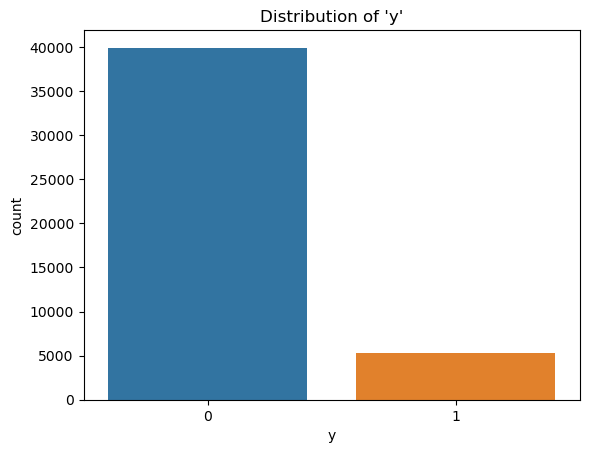

In [18]:
sns.countplot(x='y', data=d1)
plt.title("Distribution of 'y'")
plt.show()

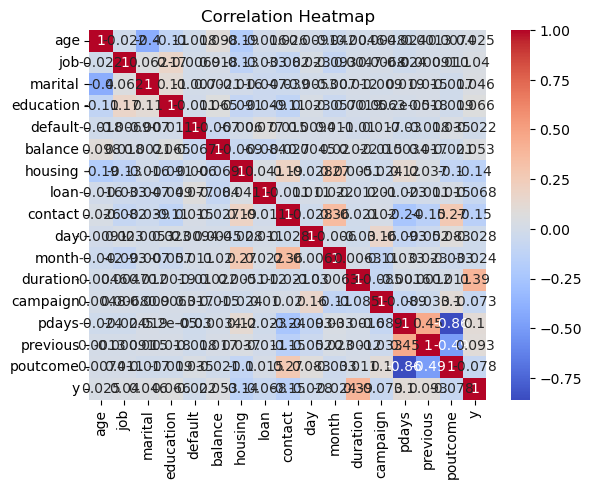

In [19]:
corr_matrix = d1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

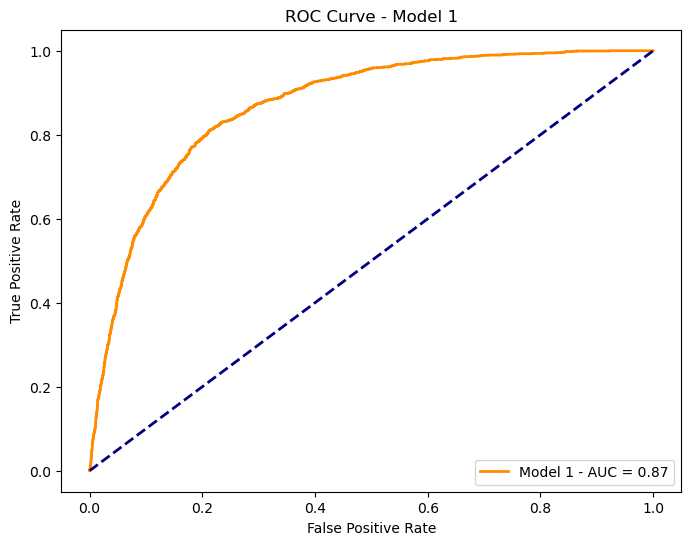

1--->[[11760   253]
 [ 1223   328]]
accuracy score of model 1--->0.8911825420230021


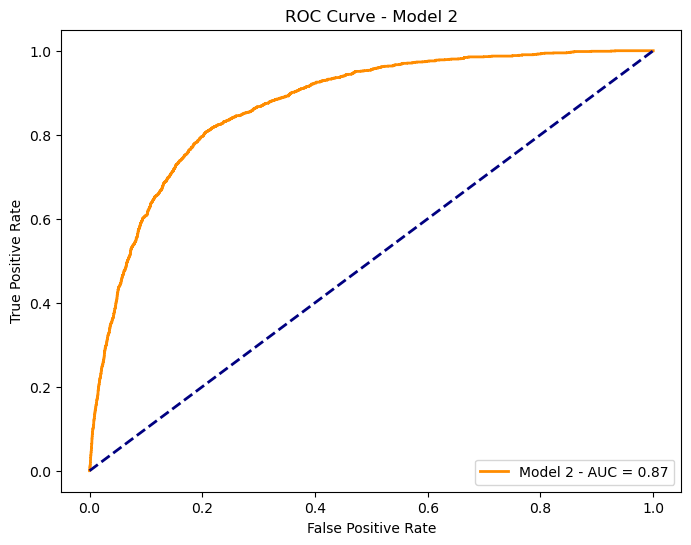

2--->[[11756   243]
 [ 1203   362]]
accuracy score of model 2--->0.893394278973754


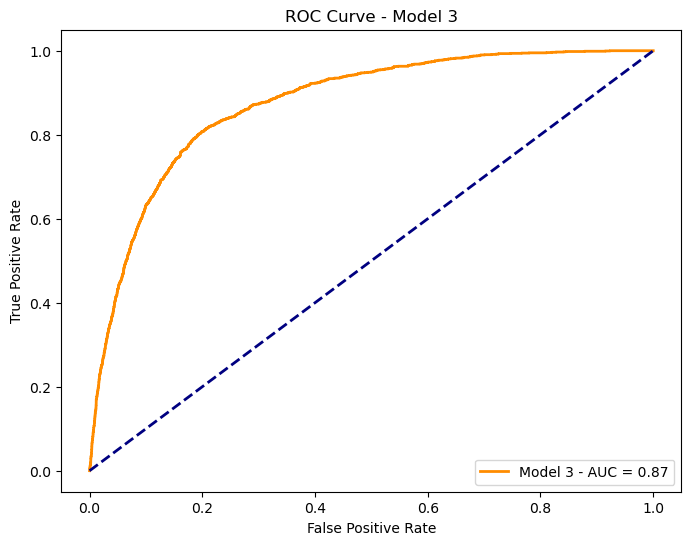

3--->[[11760   209]
 [ 1236   359]]
accuracy score of model 3--->0.8934680035387791


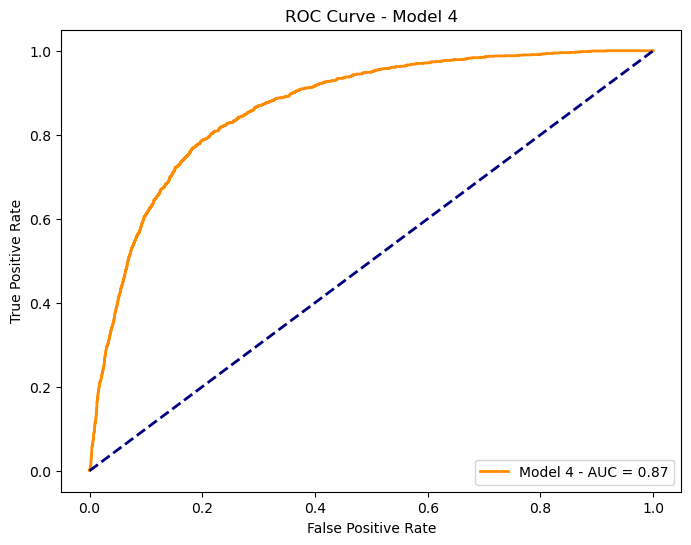

4--->[[11783   264]
 [ 1170   347]]
accuracy score of model 4--->0.8942789737540549


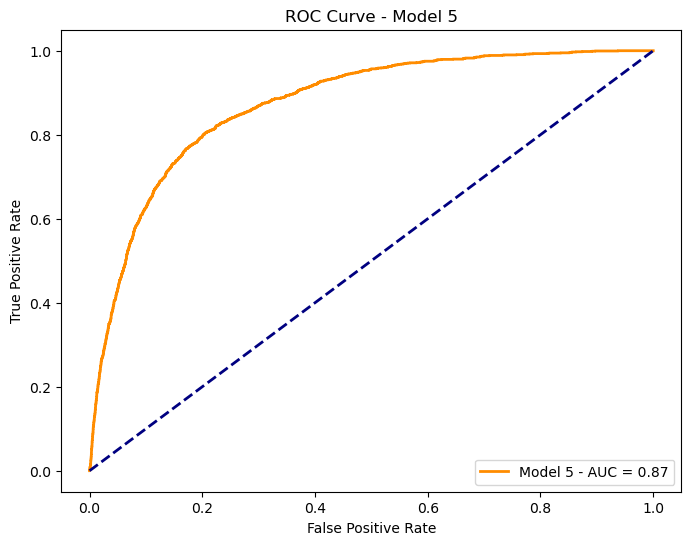

5--->[[11770   195]
 [ 1262   337]]
accuracy score of model 5--->0.8925833087584784


In [20]:
#cross validation with logistic 
for i in range(1,6):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.30,random_state=i)
    from sklearn.linear_model import LogisticRegression
    logreg=LogisticRegression(max_iter=1000)
    logreg.fit(x_train,y_train)
    # Calculate ROC curve
    y_pred_prob = logreg.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_value = auc(fpr, tpr)
    # Calculate ROC curve
    y_pred_prob = logreg.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_value = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Model {i} - AUC = {auc_value:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i}')
    plt.legend(loc="lower right")
    plt.show()
    y_pred_test=logreg.predict(x_test)
    from sklearn.metrics import accuracy_score,confusion_matrix
    print(F'{i}--->{confusion_matrix(y_test,y_pred_test)}' )
    print(f'accuracy score of model {i}--->{accuracy_score(y_test, y_pred_test)}')